<a href="https://colab.research.google.com/github/codewithdark-git/Transformers/blob/main/Self_Attention_with_General_Contextual_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction to Self-Attention with General Contextual Embeddings**

```
Find Code Here >>> github.com/codeiwthdark-git/Transformers
```
```
Follow on GitHub >>> github.com/codewithdark-git
```
```
Connect on Linkedin >>> linkedin.com/in/codewithdark
```
```
Join The OpenSource GitHub Community >>> github.com/XCollab
```

This notebook delves into the fundamental concept of **self-attention**, a key mechanism behind modern natural language processing (NLP) models like Transformers. Self-attention enables models to capture the relationships between words in a sequence, irrespective of their distance, making it a cornerstone of contextual word embeddings.

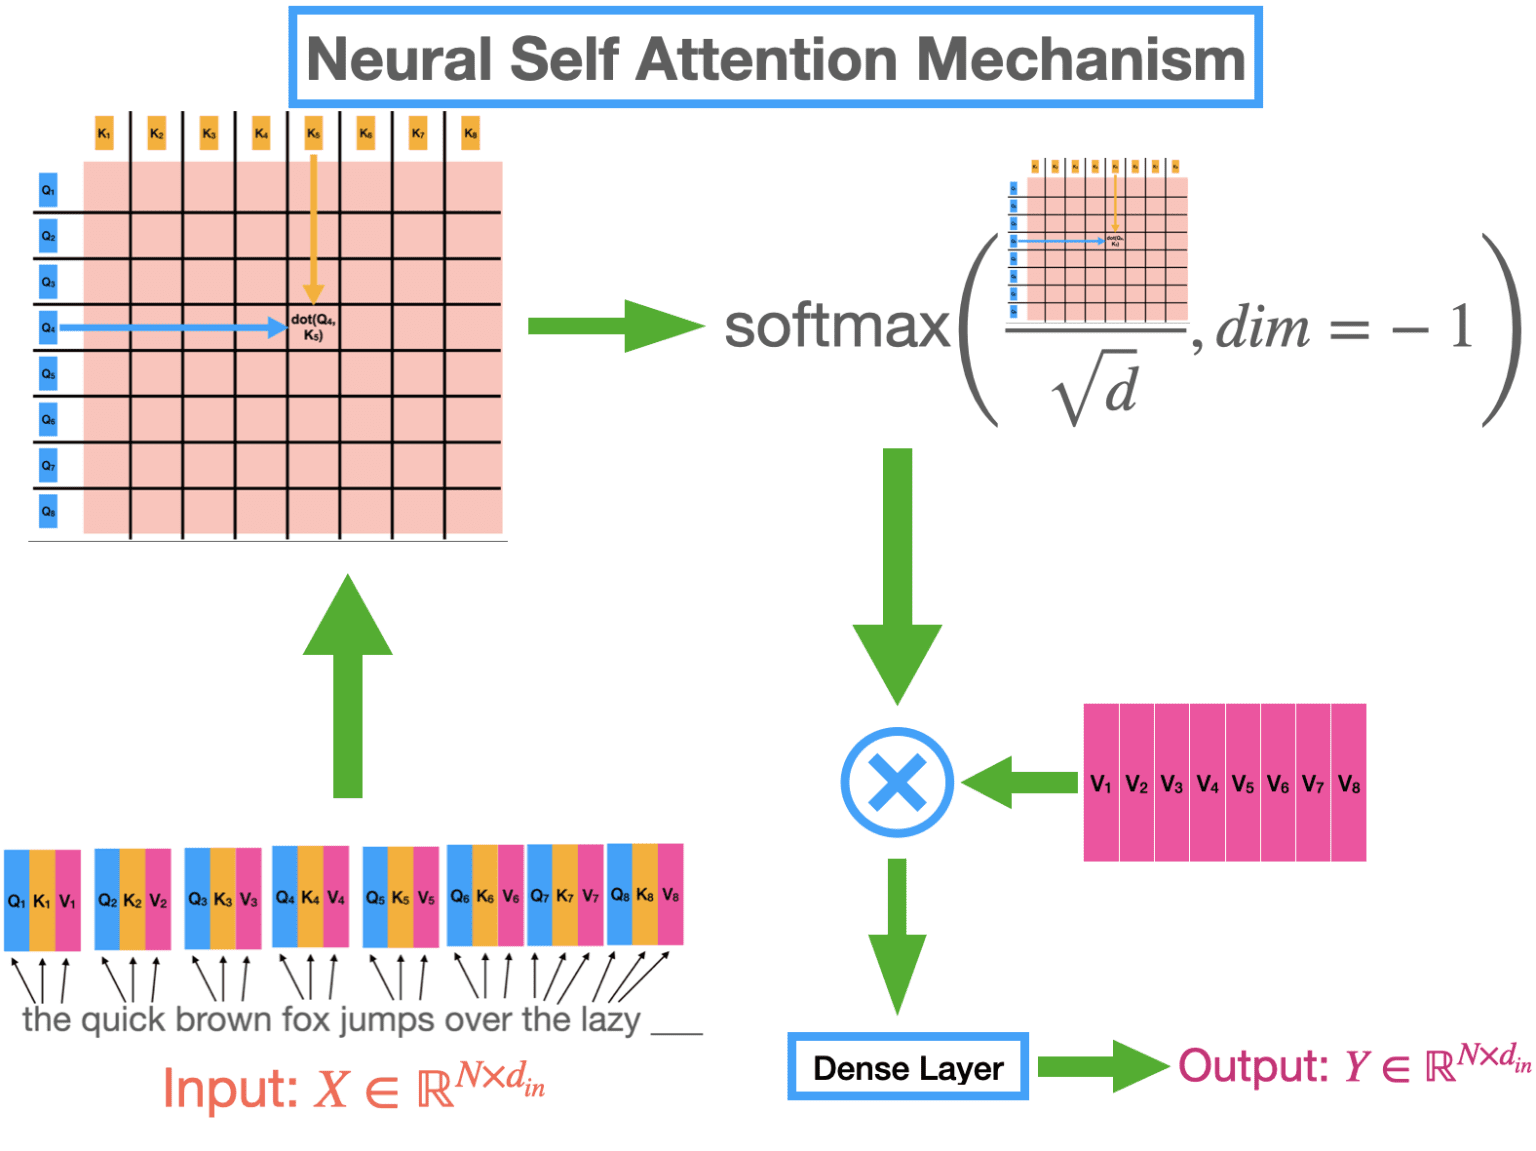

### **Key Concepts Covered in This Notebook**

1. **General Contextual Embeddings**:
   - Contextual embeddings represent words based on their meaning in a specific context, as opposed to static embeddings like Word2Vec or GloVe. These embeddings dynamically adjust based on surrounding words, capturing semantic nuances.
   - In this notebook, we begin by creating a co-occurrence-based embedding space to represent words and their relationships.

2. **Dot Product Similarity for Attention Scores**:
   - The **dot product similarity** is used to compute attention scores between words in the embedding space.
   - These scores reflect how much "attention" one word should pay to another, forming the foundation for self-attention computations.

3. **Softmax Transformation**:
   - To normalize attention scores into probabilities, the **softmax function** is applied. This ensures the scores are interpretable as weights, summing up to 1 for each word's attention distribution.

4. **Matrix Transformation for Contextualization**:
   - Using the attention weights, embeddings are transformed to encode contextual information. This highlights how the self-attention mechanism allows words to dynamically incorporate meaning based on their surroundings.

---

### **Purpose and Applications**

This notebook aims to provide an intuitive understanding of:
- How self-attention computes relationships between words using similarity measures.
- The role of softmax normalization in translating similarity scores into probabilistic attention distributions.
- The process of generating **contextual embeddings** that capture nuanced word meanings based on their context.

By the end of this notebook, you will have a solid grasp of self-attention, its mathematical foundation, and its role in generating contextual embeddings, paving the way for deeper exploration of Transformer-based architectures like BERT, GPT, and beyond.


## **Word embeddings**:

### **1. Preprocessing: Create Vocabulary**
- **Input:** A list of sentences (`corpus`).
- **Goal:** Tokenize the sentences into words, and create a vocabulary (`vocab`) that maps each unique word to a unique index.

**Explanation:**
- Each word is extracted from the sentences.
- A dictionary is created where each word is assigned an index.

**Mathematical Representation:**
If the corpus is `["I like AI", "AI is amazing"]`:
$$
\text{Vocabulary} = \{ \text{"I"}: 0, \text{"like"}: 1, \text{"AI"}: 2, \text{"is"}: 3, \text{"amazing"}: 4 \}
$$

---

### **2. Co-occurrence Matrix**
- **Goal:** Create a matrix where each cell represents how often two words co-occur within a context window.

**Explanation:**
- For each word in the sentence, consider other words within a fixed **window size** around it (e.g., ±3 words).
- Update the co-occurrence count for the word and its neighbors.

**Mathematical Representation:**
Let:
- $( C[i][j] )$: Co-occurrence of word $(i)$ with word $(j)$.
- $( \text{Window Size} = 3 )$.

For the sentence "I like AI is amazing":
$$
C[\text{"like"}][\text{"I"}] += 1, \, C[\text{"like"}][\text{"AI"}] += 1, \, C[\text{"like"}][\text{"is"}] += 1
$$

---

### **3. Normalize the Co-occurrence Matrix**
- **Goal:** Normalize each row of the matrix to ensure the sum of each row equals 1.

**Mathematical Formula:**
Let $( \text{RowSum}[i] = \sum_{j=1}^{\text{vocab\_size}} C[i][j] )$. The normalized matrix is:
$$
\text{Normalized\_Matrix}[i][j] = \frac{C[i][j]}{\text{RowSum}[i]}
$$

---

### **4. Dimensionality Reduction using SVD**
- **Goal:** Reduce the dimensions of the co-occurrence matrix to extract meaningful word embeddings.

**Explanation:**
- Perform **Singular Value Decomposition (SVD)**:
$$
M = U \cdot S \cdot V^T
$$
Where:
  - $( M )$: Co-occurrence matrix.
  - $( U )$: Left singular vectors (used for word embeddings).
  - $( S $): Singular values (diagonal matrix).
  - $( V^T )$: Right singular vectors.

- Select the top `embedding_dim` dimensions from $(U)$ to get word embeddings.

**Word Embeddings:**
Each word is represented as a vector of size `embedding_dim` (e.g., 2).

---

### **Code Walkthrough**

#### 1. Preprocessing:
```python
words = set(word for sentence in corpus for word in sentence.split())
vocab = {word: idx for idx, word in enumerate(words)}
vocab_size = len(vocab)
```

#### 2. Co-occurrence Matrix:
```python
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))
for sentence in corpus:
    tokens = sentence.split()
    for i, word in enumerate(tokens):
        word_idx = vocab[word]
        start = max(i - window_size, 0)
        end = min(i + window_size + 1, len(tokens))
        for j in range(start, end):
            if i != j:
                context_word_idx = vocab[tokens[j]]
                co_occurrence_matrix[word_idx][context_word_idx] += 1
```

#### 3. Normalize:
```python
co_occurrence_matrix = co_occurrence_matrix / np.sum(co_occurrence_matrix, axis=1, keepdims=True)
```

#### 4. Dimensionality Reduction:
```python
U, S, Vt = np.linalg.svd(co_occurrence_matrix)
embedding_dim = 2
word_embeddings = U[:, :embedding_dim]
```

---

### **Outputs**
- Prints:
  - Vocabulary.
  - Co-occurrence matrix.
  - Word embeddings.



---
## **Dot product similarity matrix**:
---

### **1. Input: Word Embeddings**
- The `embeddings` dictionary contains words as keys and their corresponding embedding vectors as values.
- Example:
  ```python
  "like": [-0.23339497, -0.01719972]
  "calm": [-0.23410982, 0.20496999]
  ```
  Each word is represented by a 2-dimensional vector.

---

### **2. Convert Embeddings to Matrix**
- The embeddings are converted into a matrix where each row corresponds to the embedding of a word.

**Mathematical Representation:**
If there are $(n)$ words and each word embedding has $(d)$ dimensions:
$$
\text{Embedding Matrix} = \begin{bmatrix}
e_{11} & e_{12} & \dots & e_{1d} \\
e_{21} & e_{22} & \dots & e_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
e_{n1} & e_{n2} & \dots & e_{nd}
\end{bmatrix}
$$
Where $(e_{ij})$ represents the $(j)-th$ dimension of the embedding for word $(i)$.

---

### **3. Compute the Dot Product Similarity**
- The **dot product similarity** between two vectors $(u)$ and $(v)$ is defined as:
$$
u \cdot v = \sum_{i=1}^d u_i v_i
$$
Where \(d\) is the number of dimensions in the embeddings.

- By computing the dot product for all pairs of words, we generate a similarity matrix.

**Similarity Matrix Formula:**
If $(E)$ is the embedding matrix $(n \times d)$, the similarity matrix
$$
S = E \cdot E^T
$$
Where $(S[i, j])$ is the dot product similarity between the $(i)-th$ and $(j)-th$ words.

---

### **4. Display the Results**
The similarity values for each word pair are printed in a matrix-like format. For example:
```
like · like = 0.0548
like · calm = 0.0343
like · place = 0.0265
...
```

---

### **Output Example**
The output will display the similarity of every word with every other word, including itself (the diagonal of the matrix will show self-similarities).

For instance:
```
Dot Product Similarity Matrix:
like · like = 0.0548
like · calm = 0.0343
like · place = 0.0265
...

calm · like = 0.0343
calm · calm = 0.0983
...
```

---

### **What Does the Dot Product Similarity Represent?**
- The dot product measures how aligned two embedding vectors are in the vector space.
- A **higher value** indicates greater similarity in terms of meaning or usage in the dataset that generated the embeddings.
- A **lower (or negative) value** indicates less similarity or orthogonality between the two vectors.

---

### **Mathematical Insights**
1. **Self-similarity:** The dot product of a word with itself represents the magnitude squared of the embedding vector:
$$
   \text{Self-similarity for } u: \, u \cdot u = ||u||^2
$$
2. **Symmetry:** The similarity matrix is symmetric:
$$
   u \cdot v = v \cdot u
$$

---
## **Softmax**:
---

### **1. What is Softmax?**
- The **softmax** function transforms a vector (or matrix) of real values into a probability distribution.
- The output values are in the range $([0, 1])$, and the rows of the matrix will sum to 1.
- It is defined as:
$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$
Where:
  - $(x_i)$: The $(i)-th$ element of the input vector.
  - $(n)$: The total number of elements in the input vector.

---

### **2. Function Explanation**

#### **Step 1: Exponentiate Each Element**
```python
exp_matrix = np.exp(matrix)
```
- The exponential function $(e^x)$ is applied to each element of the input matrix.
- This ensures all values are positive and highlights larger values.

---

#### **Step 2: Compute Row-Wise Sums**
```python
row_sums = np.sum(exp_matrix, axis=1, keepdims=True)
```
- The sum of the exponentials is computed for each row.
- `keepdims=True` ensures the result has the same dimensionality as `exp_matrix` for proper broadcasting.

---

#### **Step 3: Normalize Rows**
```python
return exp_matrix / row_sums
```
- Each element of the matrix is divided by the sum of its row.
- This step ensures that the rows sum to 1, making the output a valid probability distribution.

---

#### **Weighted Contextual Embeddings**
The normalized similarity weights are then used to compute **contextual embeddings**:

$$
\text{ContextualEmbedding}(i) = \sum_{j} \text{Weight}(i, j) \cdot \text{Embedding}(j)
$$

---

### **Mathematical Representation**
For an input matrix $(M)$ of size $(m \times n)$, where $(M_{ij})$ represents the element in the $(i)-th$ row and $(j)-th$ column:
1. Compute the exponentials:
$$
E_{ij} = e^{M_{ij}}
$$
2. Compute row sums:
$$
\text{RowSum}_i = \sum_{j=1}^n E_{ij}
$$
3. Normalize:
$$
\text{Softmax}_{ij} = \frac{E_{ij}}{\text{RowSum}_i}
$$

---

### **Why Use Softmax?**
- **Probability Interpretation:** Converts arbitrary scores into probabilities, where higher scores correspond to higher probabilities.
- **Classification:** Often used in the output layer of neural networks for multi-class classification.

---

### **Example Usage**

#### Input:
```python
matrix = np.array([[2.0, 1.0, 0.1],
                   [1.0, 3.0, 2.0]])
```

#### Softmax Computation:
1. Exponentiate:
   \[
   e^{[2.0, 1.0, 0.1]} = [7.389, 2.718, 1.105]
   \]
   Similarly for the second row.

2. Row-wise sums:
   \[
   \text{RowSum}_1 = 7.389 + 2.718 + 1.105 = 11.212
   \]

3. Normalize:
   \[
   \text{Softmax}_1 = [7.389 / 11.212, 2.718 / 11.212, 1.105 / 11.212] = [0.659, 0.242, 0.099]
   \]

#### Output:
```python
[[0.65900114, 0.24243297, 0.09856589],
 [0.09003057, 0.66524096, 0.24472847]]
```

---
## **matrix multiplication**:
---

### **1. Matrix Multiplication (Dot Product)**
The operation:
```python
result = np.dot(x, similarity_matrix)
```
- Computes the dot product between matrix $(x)$ and the `similarity_matrix`.
- The **result** is a new matrix whose shape depends on the dimensions of
$(x)$ and `similarity_matrix`.

#### **Matrix Multiplication Rule:**
If $(x)$ has shape $(a, b)$ and `similarity_matrix` has shape $(b, c)$, then the resulting matrix will have shape:
\[
\text{Resulting Matrix Shape: } (a, c)
\]
For matrix multiplication to work, the number of columns in $(x)$ $(b)$ must equal the number of rows in `similarity_matrix` $(b)$.

---

### **2. Display Shapes**
```python
print("Softmax Matrix Shape:", x.shape)
print("Similarity Matrix Shape:", similarity_matrix.shape)
print("Resulting Matrix Shape:", result.shape)
```
- **Purpose:** Verifies the shapes of $(x)$, `similarity_matrix`, and `result` to confirm that:
  - $(x)$ and `similarity_matrix` are compatible for multiplication.
  - The resulting matrix has the expected dimensions.

---

### **3. Display Resulting Matrix**
```python
print("\nResulting Matrix:")
print(result)
```
- **Purpose:** Prints the final matrix after the dot product.
- This matrix could represent various quantities, such as weighted probabilities or scores, depending on the context.

---

### **Example Walkthrough**
Let’s assume the following:
1. **Input Matrices:**
   - $(x)$ has shape $(2, 3)$, e.g.:
$$
     x = \begin{bmatrix}
     0.1 & 0.3 & 0.6 \\
     0.5 & 0.4 & 0.1
     \end{bmatrix}
$$
   - `similarity_matrix` has shape $(3, 4)$, e.g.:
$$
     \text{similarity_matrix} = \begin{bmatrix}
     1 & 0 & 2 & 1 \\
     0 & 1 & 1 & 0 \\
     1 & 0 & 0 & 1
     \end{bmatrix}
$$

2. **Matrix Multiplication:**
   - Multiply $(x)$ $(2 \times 3)$ with `similarity_matrix` $(3 \times 4)$:
$$
     \text{Resulting Matrix} = \begin{bmatrix}
     0.8 & 0.3 & 0.6 & 0.7 \\
     1.6 & 0.4 & 1.4 & 1.1
     \end{bmatrix}
$$
   - The result has shape $(2, 4)$.

3. **Output:**
```
Softmax Matrix Shape: (2, 3)
Similarity Matrix Shape: (3, 4)
Resulting Matrix Shape: (2, 4)
```
Resulting Matrix:
[[0.8 0.3 0.6 0.7]
 [1.6 0.4 1.4 1.1]]


---

### **Key Points to Verify:**
1. Ensure the shapes are compatible for multiplication: the number of columns in \(x\) matches the number of rows in `similarity_matrix`.
2. The resulting matrix's shape should have the same number of rows as \(x\) and the same number of columns as `similarity_matrix`.


